# generate dataset

In [2]:
from scripts.get_top_stocks import *


top_stocks_long, top_stocks_long_short = generate_top_stocks_df()
common_top_stocks = get_common_top_stocks(top_stocks_long, top_stocks_long_short)

/Users/I748920/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Results saved to 'top_30_stocks_long_only.csv' and 'top_30_stocks_long_short.csv'

Detailed metrics for top stock (Long-Only Strategy) SMCI:
Final Close Price: 284.26
60-day Return: 250.61%
Average Hourly Volatility: 0.6678
Average Sharpe Ratio: 1.6242
Average Hourly Volume: 355714

num common_top_stocks:  35


In [3]:
# specify variables for dataset generation

start_date = '2023-01-01'
end_date = '2024-08-01'
interval = "1h"
trading_days_per_year = 252
hours_per_day = 6.5

In [4]:
from scripts.generate_dataset_features import *


df = get_all_stock_features_df(
    stocks_list=common_top_stocks,
    start_date=start_date,
    end_date=end_date,
    interval=interval,
    trading_days_per_year=trading_days_per_year, 
    hours_per_day=hours_per_day
)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

# training

In [5]:
print(df.shape)
df.head()

(89574, 81)


,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,Momentum256,PriceVolatilityHourly,MACD8,MACD16,MACD32,MACD64,MACD128,MACD256,FamaFrenchMktReturns,Log_Return_shift
0,2023-02-24 13:30:00-05:00,195.539993,196.649994,195.029999,195.729904,195.729904,13846409,0.001063,-0.061996,-0.012796,...,1.0,0.619995,-36.468614,3.478303,1.164369,-0.106194,-2.441181,-9.149096,-1.09,0.002399
1,2023-02-24 14:30:00-05:00,195.740005,197.339996,194.789993,196.199997,196.199997,17336549,0.002399,0.052089,0.111925,...,1.0,1.000000,-4.346177,-12.988555,2.395682,-0.086038,-2.888032,-10.735282,-1.09,0.003368
2,2023-02-24 15:30:00-05:00,196.199997,197.149994,195.660004,196.862000,196.862000,10435043,0.003368,-0.161806,-0.248510,...,1.0,0.489990,-1.554868,-2.171243,-76.721433,-0.071925,-3.776554,-13.945836,-1.09,0.050361
3,2023-02-27 09:30:00-05:00,202.029999,208.220001,201.259995,207.029999,207.029999,48283679,0.050361,0.328704,0.644575,...,1.0,1.000000,0.470857,0.033111,-0.119096,0.037813,1.365719,4.694838,0.31,-0.007151
4,2023-02-27 10:30:00-05:00,207.009995,207.428101,204.220200,205.554794,205.554794,25139194,-0.007151,-0.129301,-0.315222,...,1.0,1.000000,3.222252,0.301661,-0.097762,0.080424,1.804059,5.950604,0.31,-0.001046


In [6]:
df.columns

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Log_Return', 'EMAVolumeDiff2', 'SMAVolumeDiff2', 'EMACloseDiff2',
       'SMACloseDiff2', 'VWAP2', 'VolatilityStdDev2', 'Volatility2',
       'Momentum2', 'EMAVolumeDiff4', 'SMAVolumeDiff4', 'EMACloseDiff4',
       'SMACloseDiff4', 'VWAP4', 'VolatilityStdDev4', 'Volatility4',
       'Momentum4', 'EMAVolumeDiff8', 'SMAVolumeDiff8', 'EMACloseDiff8',
       'SMACloseDiff8', 'VWAP8', 'VolatilityStdDev8', 'Volatility8',
       'Momentum8', 'EMAVolumeDiff16', 'SMAVolumeDiff16', 'EMACloseDiff16',
       'SMACloseDiff16', 'VWAP16', 'VolatilityStdDev16', 'Volatility16',
       'Momentum16', 'EMAVolumeDiff32', 'SMAVolumeDiff32', 'EMACloseDiff32',
       'SMACloseDiff32', 'VWAP32', 'VolatilityStdDev32', 'Volatility32',
       'Momentum32', 'EMAVolumeDiff64', 'SMAVolumeDiff64', 'EMACloseDiff64',
       'SMACloseDiff64', 'VWAP64', 'VolatilityStdDev64', 'Volatility64',
       'Momentum64', 'EMAVolumeDiff128', 'SMAVolum

In [7]:
target = "Log_Return_shift"
features = df.columns[8:-1]
len(features)

72

In [8]:
X = df[features].to_numpy()
y = df[target].to_numpy()
X.shape,y.shape

((89574, 72), (89574,))

In [9]:
from scripts.train_predict import *

X_train,y_train,X_val,y_val,X_test,y_test = train_val_test_split(X, y, 0.8, 0.1, 0.1)
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((71659, 72), (71659,), (8957, 72), (8957,), (8958, 72), (8958,))

In [10]:
# Initialize transformations
# Important note: do standard scaling first before PCA
scaler = StandardScaler()
selector = SelectKBest(f_regression, k=10)
pca = PCA(n_components = 0.95)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
X_train = selector.fit_transform(X_train, y_train)
X_train = pca.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)
X_val = selector.transform(X_val)
X_val = pca.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
X_test = selector.transform(X_test)
X_test = pca.transform(X_test)

cols_idxs = selector.get_support(indices=True)
# features_df_new = X[:train_size].iloc[:,cols_idxs]
# features_df_new

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((71659, 8), (71659,), (8957, 8), (8957,), (8958, 8), (8958,))

In [24]:
def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        # 'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (64,8), (64,16,), (32,8), (16,8), (8,16,), (8,64,)], # Different architectures
        # 'activation': ['relu', 'tanh'], # Different activation functions
        # 'solver': ['adam', 'sgd'], # Different solvers
        # 'alpha': [0.0001, 0.001], # Different regularization terms
        # 'learning_rate': ['constant', 'adaptive'], # Different learning rates
        'hidden_layer_sizes': [(8,64), (8,4), (8,2), (4,2),(2),(1),(4)], # Different architectures
        # 'hidden_layer_sizes': [(8,64), (16,64), (32,64), (32, 128)], # Different architectures
        'activation': ['relu'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.001], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPRegressor(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        score = mean_squared_error(y_val, y_pred)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Test set mean squared error: {round(mse, 5)}")
    print(f"Test set mean absolute error: {round(mae, 5)}")
    
    return y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    y_pred = predict(best_model, X_test, y_test)
    
    plt.plot(y_test,label='test groundtruth')
    plt.plot(y_pred,label='test predictions')
    plt.title(target)
    plt.legend()
    plt.show()
    
    return best_model, best_params, best_score, y_pred

on 0: score: 6.68e-05
on 1: score: 5.78e-05
on 3: score: 5.59e-05
on 4: score: 5.56e-05
|████████████████████████████████████████| 7/7 [100%] in 4.8s (1.47/s) 
Best parameters found: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 2, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 6e-05
Test set mean squared error: 0.0001
Test set mean absolute error: 0.0054


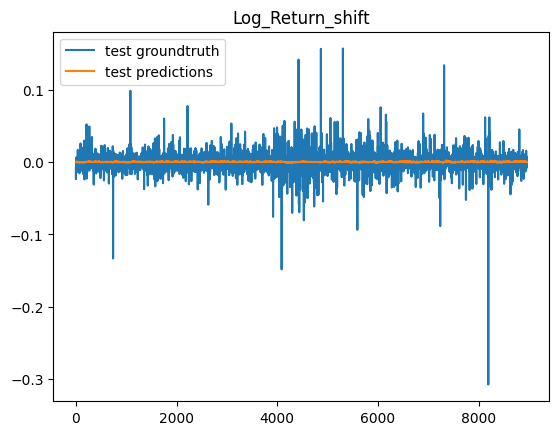

In [26]:
best_model, best_params, best_score, y_pred = train_predict()

Percentage of prediction with correct signal direction: 0.5234427327528466


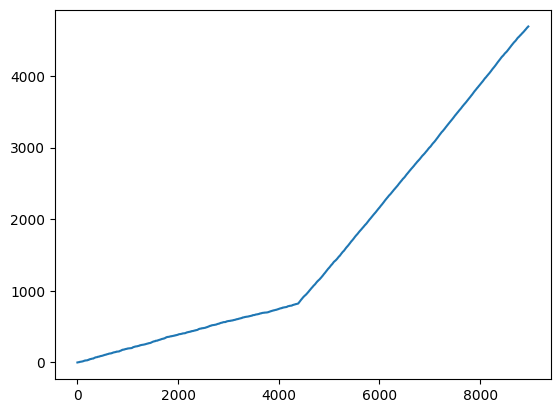

In [30]:
output = []
cumsum = []
for i, v in enumerate(y_pred):
    output.append((y_test[i], y_pred[i]))

output.sort()

total_correct = 0
for x, y in output:
    total_correct += x * y >= 0
    cumsum.append(total_correct)

pct_correct_direction = cumsum[-1] / len(output)
print(f"Percentage of prediction with correct signal direction: {pct_correct_direction}")
plt.plot(cumsum)

# check features-target plot

In [32]:
X_train.shape

(71659, 8)

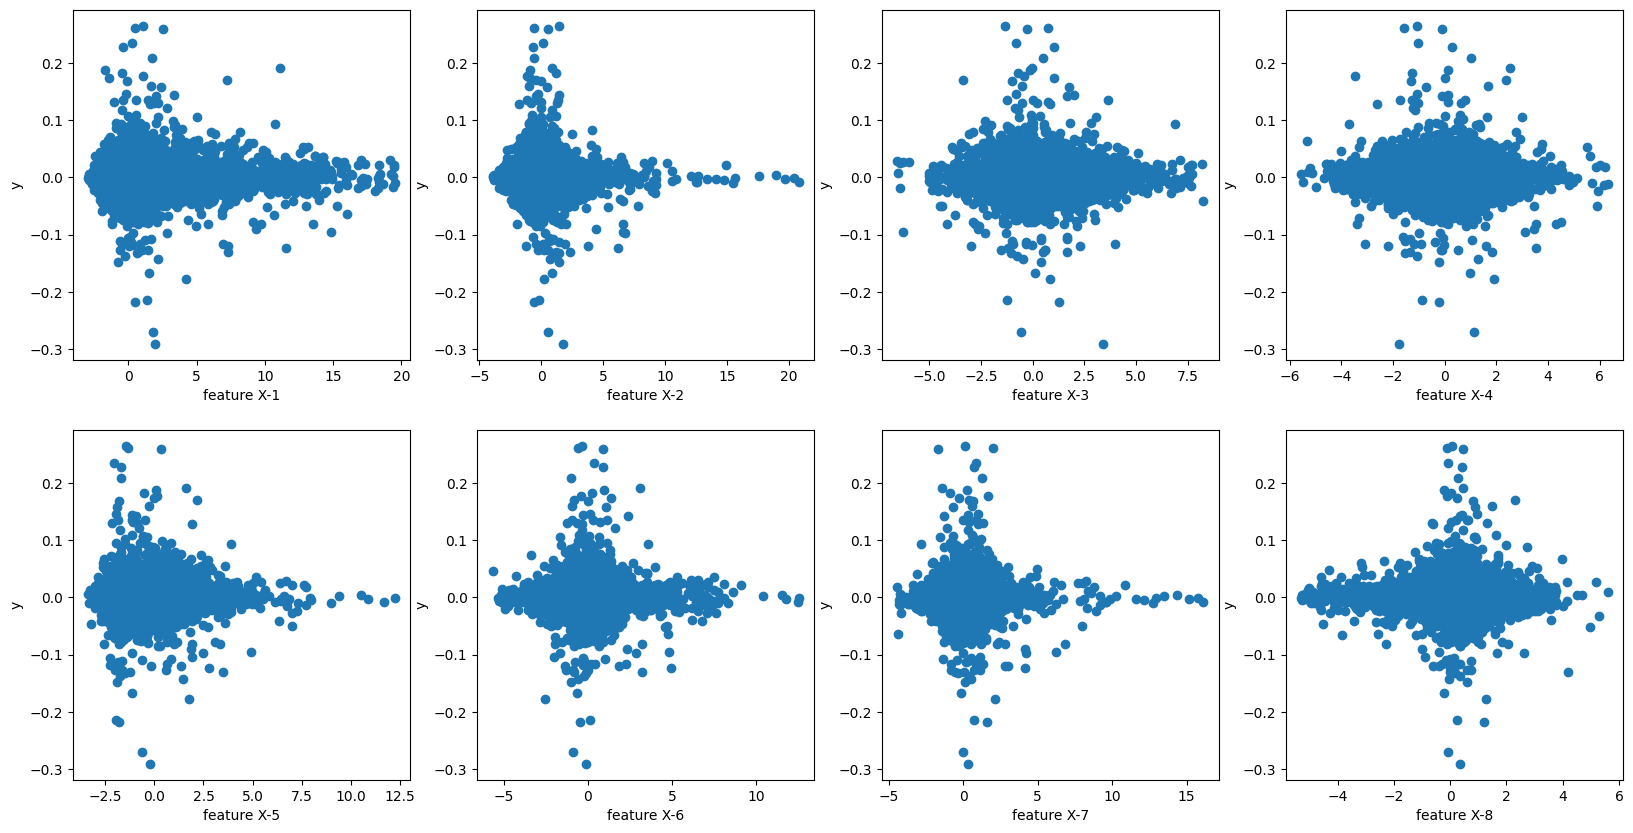

In [42]:
fig,ax=plt.subplots(2,4,figsize=(20,10))

for i in range(X_train.shape[1]):
    plt.subplot(2,4,i+1)
    plt.scatter(X_train[:,i],y_train)
    plt.xlabel(f"feature X-{i+1}")
    plt.ylabel("y")
plt.show()

# linear regression

In [44]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((71659, 8), (71659,), (8957, 8), (8957,), (8958, 8), (8958,))

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.coef_)
print(reg.intercept_)

preds = reg.predict(X_test)
mean_squared_error(y_test,preds)

0.007020053711372265
[ 7.10034706e-05 -1.06527123e-04 -3.27981379e-04 -6.77937927e-04
  1.08510523e-04  2.38035590e-04 -2.72654973e-04  1.94445732e-04]
0.00022684529360667328


0.00010192187153137008

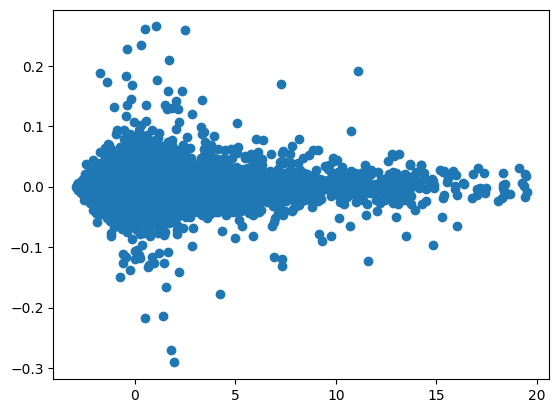

In [48]:
plt.scatter(X_train[:,0],y_train)

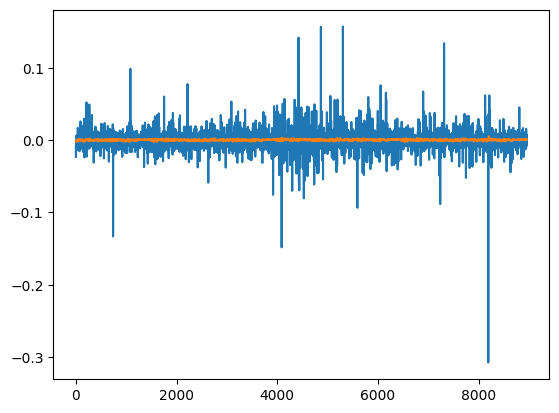

In [50]:
plt.plot(y_test)
plt.plot(preds)

# kernel regression

In [52]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((71659, 8), (71659,), (8957, 8), (8957,), (8958, 8), (8958,))

In [ ]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np

krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)

In [ ]:
krr.score(X_train,y_train),krr.score(X_val,y_val)

In [ ]:
krr.get_params()

In [ ]:
preds = krr.predict(X_test)